In [40]:
import pytesseract as pt
import cv2
import numpy as np
import matplotlib.pyplot as plt

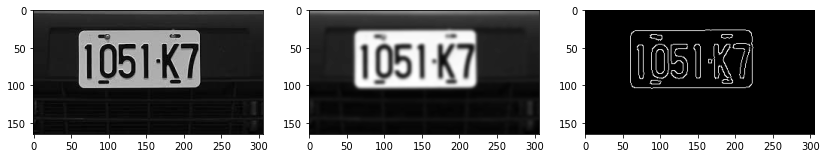

In [41]:
img = cv2.imread(r"C:\Users\user\Downloads\s.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
binaryIMG = cv2.Canny(blurred, 20, 160)
plt.figure(figsize=(14,10))
plt.subplot(131)
plt.imshow(gray,cmap="gray")
plt.subplot(132)
plt.imshow(blurred,cmap="gray")
plt.subplot(133)
plt.imshow(binaryIMG,cmap="gray")

60 26 164 79


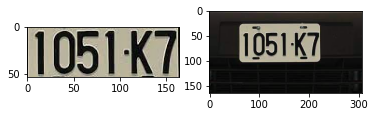

In [42]:
(cnts, _) = cv2.findContours(binaryIMG.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#clone = cv2.drawContours(img, cnts, -1, (0, 255, 0), 5)
(x, y, w, h) = cv2.boundingRect(cnts[0])
print(x,y,w,h)

# 擷取的範圍
pts1 = np.array([[60,25+15],[60,25+h-10],[60+w,25+15],[60+w,25+h-10]],dtype="float32")
# 建立圖片大小
pts2 = np.array([[0,0],[0,h-25],[w,0],[w,h-25]],dtype="float32")

M = cv2.getPerspectiveTransform(pts1 ,pts2)

res = cv2.warpPerspective(img, M,(w,h-25) )

plt.subplot(121)
plt.imshow(res,cmap="gray")
plt.subplot(122)
plt.imshow(img,cmap="gray")

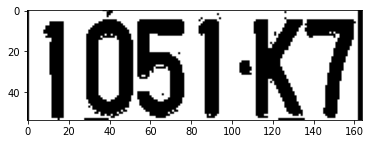

In [43]:
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
ret, img=cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)
plt.imshow(img,cmap="gray")

0
1
2
3
4
5
6
7
8


<Figure size 1008x720 with 0 Axes>

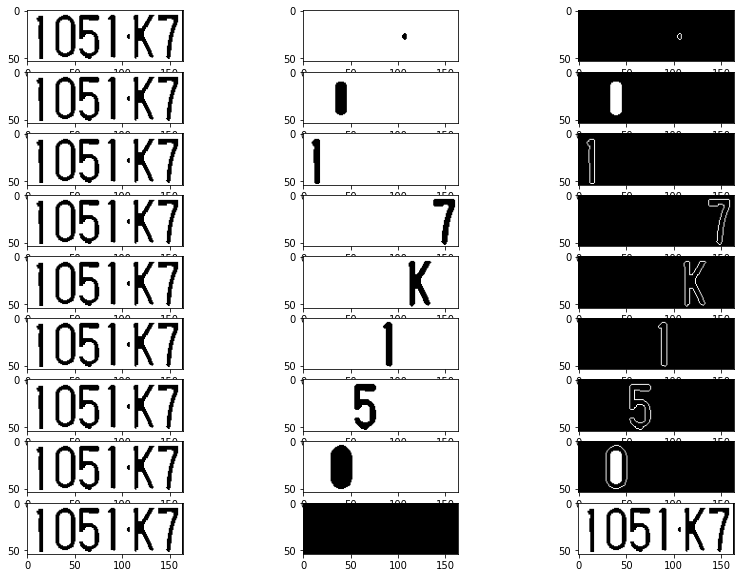

In [44]:
test = img.copy()
kernel =np.ones((3,3),np.uint8)
test=cv2.dilate(test, kernel,iterations = 1)


(cnts, _) = cv2.findContours(test.copy(), cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(14,10))

for i in range(len(cnts)):
     print(i)
        
plt.figure(figsize=(14,10))
plt.imshow(test)

for idx,c in enumerate(cnts):  
    mask = np.full(test.shape, 0, np.uint8)  # 依Contours圖形建立mask
    mask = cv2.drawContours(mask, [c], -1, (255,255,255), -1) #255→白色, -1→塗滿
    plt.subplot(9,3,idx*3+1)
    plt.imshow(test,cmap="gray")
    plt.subplot(9,3,idx*3+2)
    plt.imshow(255-mask,cmap="gray")
    plt.subplot(9,3,idx*3+3)
    plt.imshow(cv2.bitwise_and(test, test, mask=mask),cmap="gray")


"I 05] 'K7\\\n\n"

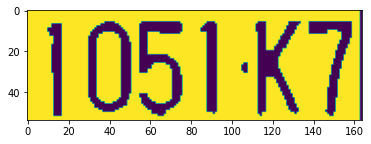

In [45]:
plt.imshow(test,cmap="gray")
kk =pt.image_to_string(test)
kk